<a href="https://colab.research.google.com/github/pSN0W/AI_Practice/blob/main/Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loading Data from kaggle


In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pratyakshsingh","key":"e1a64879a9d9f50ccfaafd16798ab02d"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

#change the permission
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c digit-recognizer

 82% 5.00M/6.09M [00:00<00:00, 47.6MB/s]
100% 6.09M/6.09M [00:00<00:00, 38.8MB/s]
  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 73.1MB/s]
  0% 0.00/9.16M [00:00<?, ?B/s]
100% 9.16M/9.16M [00:00<00:00, 84.1MB/s]


In [5]:
from zipfile import ZipFile
file_name = "train.csv.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()

#Loading QMNIST


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv('train.csv')

In [8]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
label_Q=df['label']
df=df.drop('label',axis=1)

In [10]:
df.shape

(42000, 784)

In [11]:
label_Q.shape

(42000,)

8


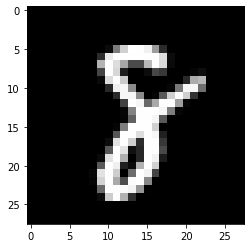

In [12]:
ind=300
changed_matrix=np.array(df.iloc[ind]).reshape(28,28)
plt.imshow(changed_matrix,cmap='gray')
print(label_Q.iloc[ind])

#PCA


In [13]:
#Sampling Data
data=df
label=label_Q
data.shape

(42000, 784)

In [14]:
data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
# Data Preprocessing standorizing data

from sklearn.preprocessing import StandardScaler

standord_data=StandardScaler().fit_transform(data)
standord_data.shape

(42000, 784)

In [16]:
covariance_matrix=standord_data.T@standord_data
covariance_matrix.shape

(784, 784)

In [17]:
#Finding eigen values
# eigh function will return the eigen values in asending order
# this code generates only the top 2 (782 and 783) eigenvalues.

from scipy.linalg import eigh

values,vector=eigh(covariance_matrix,eigvals=(782,783))
tot_values,_=eigh(covariance_matrix)
print(vector.shape)
print(len(tot_values))
print("conserved = ",np.sum(values)/np.sum(tot_values))

(784, 2)
784
conserved =  0.0985964439387817


In [18]:
# Resulting Matrix

final_mat=standord_data@vector

print(final_mat.shape,(label.T).shape)
print(label[1:5])
final_mat[1:5,:]

(42000, 2) (42000,)
1    0
2    1
3    4
4    0
Name: label, dtype: int64


array([[ 6.03299601, 19.29233234],
       [-1.70581328, -7.64450341],
       [ 5.83613925, -0.47420666],
       [ 6.02481844, 26.55957444]])

In [19]:
#converting label to a column vector
label=np.array(label)
label=label.reshape(-1,1)
label

array([[1],
       [0],
       [1],
       ...,
       [7],
       [6],
       [9]])

In [20]:
data_mat=np.concatenate((final_mat,label),axis=1)
print(data_mat.shape)
data_mat[1:5,:]

(42000, 3)


array([[ 6.03299601, 19.29233234,  0.        ],
       [-1.70581328, -7.64450341,  1.        ],
       [ 5.83613925, -0.47420666,  4.        ],
       [ 6.02481844, 26.55957444,  0.        ]])

In [21]:
dataframe=pd.DataFrame(data=data_mat,columns=("1st_principal", "2nd_principal", "label"))
dataframe.head()

,1st_principal,2nd_principal,label
0,-5.226445,-5.140478,1.0
1,6.032996,19.292332,0.0
2,-1.705813,-7.644503,1.0
3,5.836139,-0.474207,4.0
4,6.024818,26.559574,0.0


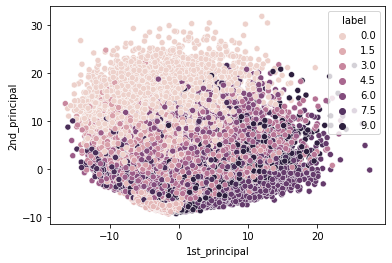

In [22]:
sns.scatterplot(x="1st_principal",y="2nd_principal",data=dataframe,hue='label')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


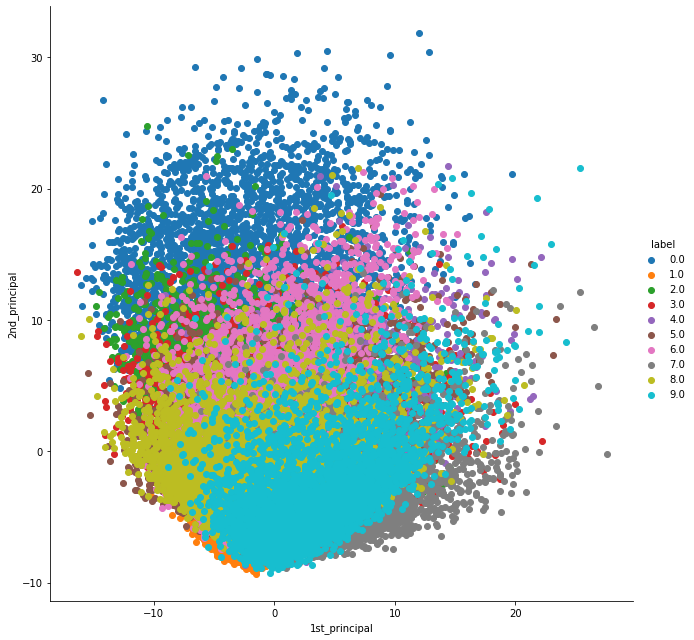

In [23]:
sns.FacetGrid(dataframe,hue='label',size=9).map(plt.scatter,'1st_principal','2nd_principal').add_legend()

#PCA(Automatic)

In [24]:
from sklearn import decomposition
pca=decomposition.PCA()

In [25]:
pca.n_components=2
pca_data=pca.fit_transform(standord_data)
pca_data.shape

(42000, 2)

In [26]:
pca_data=np.concatenate((pca_data,label),axis=1)
pca_data.shape

(42000, 3)

In [27]:
pca_data=pca_data[:,:3]
pca_data.shape

(42000, 3)

In [28]:
pca_data[1:5,:]

array([[19.29235969,  6.03302189,  0.        ],
       [-7.64452763, -1.70566183,  1.        ],
       [-0.47419213,  5.83593525,  4.        ],
       [26.55958564,  6.02491886,  0.        ]])

In [29]:
#define a dataframe
pca_df=pd.DataFrame(data=pca_data,columns=("1st_principal","2nd_principal","label"))
pca_df.head()

,1st_principal,2nd_principal,label
0,-5.140430,-5.226497,1.0
1,19.292360,6.033022,0.0
2,-7.644528,-1.705662,1.0
3,-0.474192,5.835935,4.0
4,26.559586,6.024919,0.0


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


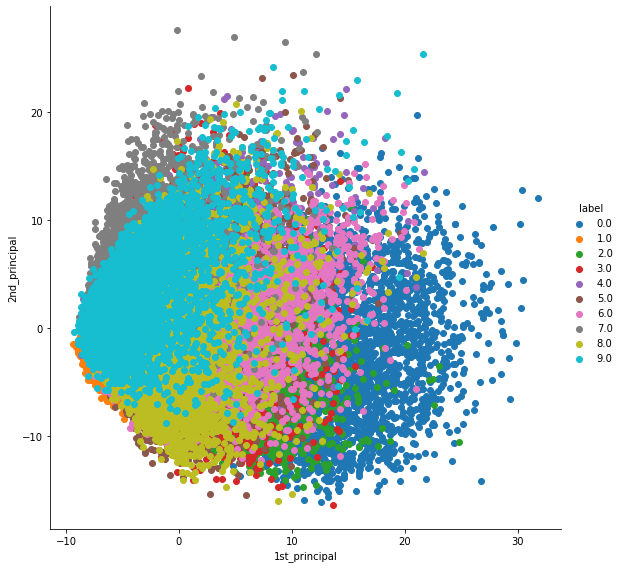

In [30]:
sns.FacetGrid(pca_df,hue='label',size=8).map(plt.scatter,"1st_principal","2nd_principal").add_legend()

#PCA for Dimensiolity Reduction

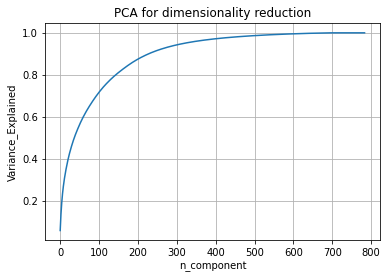

In [31]:
pca.n_components=784
pca_daaata=pca.fit_transform(standord_data)
percentage_var_explained=pca.explained_variance_/np.sum(pca.explained_variance_)
cum_var_explained=np.cumsum(percentage_var_explained)
plt.plot(cum_var_explained)
plt.xlabel("n_component")
plt.ylabel("Variance_Explained")
plt.title("PCA for dimensionality reduction")
plt.grid()

#t-SNE

In [32]:
#Taking 1000 datasets to run t-SNE
t_data=standord_data[:1000,:]
t_label=label[:1000]

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'perplexity = 30 and step=1000')

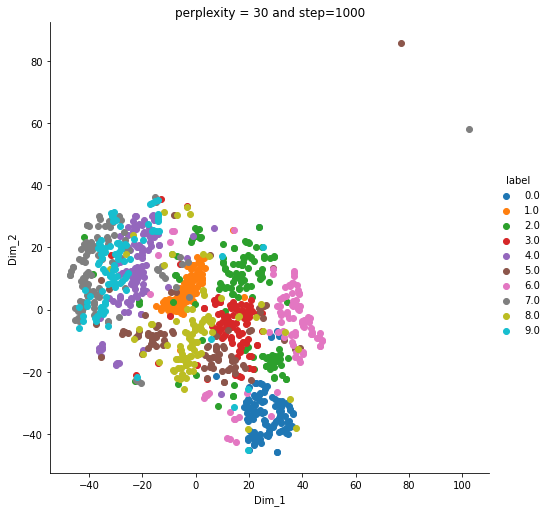

In [33]:
from sklearn.manifold import TSNE

model=TSNE(n_components=2,random_state=0)
#n_component means you want 2D at last
#giving random state reduces the probabitity of getting different output in each iteration
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_dat=model.fit_transform(t_data)

#creating a new dataframe to help us in plotting
tsne_data=np.concatenate((tsne_dat,t_label),axis=1)
tsne_df=pd.DataFrame(data=tsne_data,columns=("Dim_1", "Dim_2", "label"))

#Plotting the result of TSNE
sns.FacetGrid(tsne_df,hue='label',size=7).map(plt.scatter,'Dim_1',"Dim_2").add_legend()
plt.title("perplexity = 30 and step=1000")

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'perplexity = 50 and step=1000')

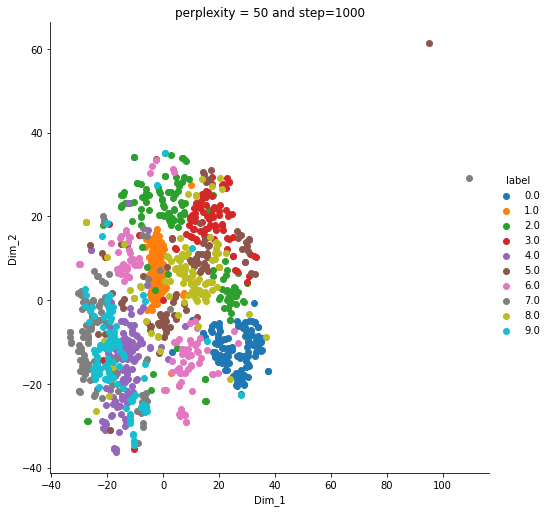

In [34]:
model=TSNE(n_components=2,random_state=0,perplexity=50)

tsne_dat=model.fit_transform(t_data)

#creating a new dataframe to help us in plotting
tsne_data=np.concatenate((tsne_dat,t_label),axis=1)
tsne_df=pd.DataFrame(data=tsne_data,columns=("Dim_1", "Dim_2", "label"))

#Plotting the result of TSNE
sns.FacetGrid(tsne_df,hue='label',size=7).map(plt.scatter,'Dim_1',"Dim_2").add_legend()
plt.title("perplexity = 50 and step=1000")

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'perplexity = 2 and step=1000')

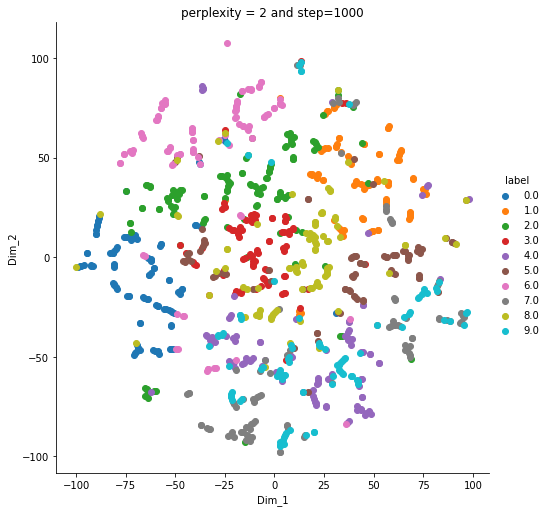

In [35]:
model=TSNE(n_components=2,random_state=0,perplexity=2)

tsne_dat=model.fit_transform(t_data)

#creating a new dataframe to help us in plotting
tsne_data=np.concatenate((tsne_dat,t_label),axis=1)
tsne_df=pd.DataFrame(data=tsne_data,columns=("Dim_1", "Dim_2", "label"))

#Plotting the result of TSNE
sns.FacetGrid(tsne_df,hue='label',size=7).map(plt.scatter,'Dim_1',"Dim_2").add_legend()
plt.title("perplexity = 2 and step=1000")

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'perplexity = 50 and step=1000')

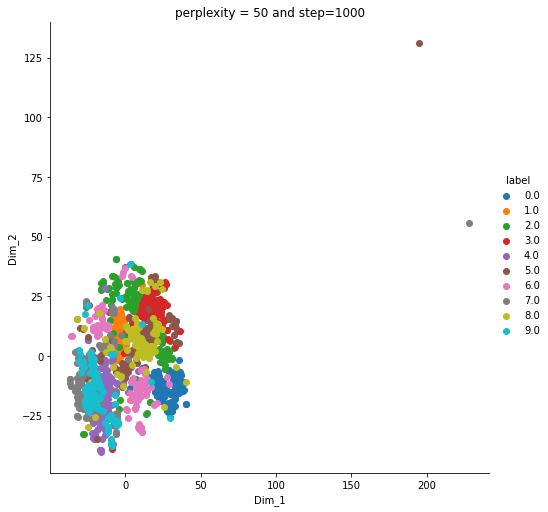

In [36]:
model=TSNE(n_components=2,random_state=0,perplexity=50,n_iter=5000)

tsne_dat=model.fit_transform(t_data)

#creating a new dataframe to help us in plotting
tsne_data=np.concatenate((tsne_dat,t_label),axis=1)
tsne_df=pd.DataFrame(data=tsne_data,columns=("Dim_1", "Dim_2", "label"))

#Plotting the result of TSNE
sns.FacetGrid(tsne_df,hue='label',size=7).map(plt.scatter,'Dim_1',"Dim_2").add_legend()
plt.title("perplexity = 50 and step=1000")

perplexity=50 and n_iter=5000 gives good result so we will choose it for 45K points

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'QMNIST dor 42k points at perplexity=50 and steps=5000')

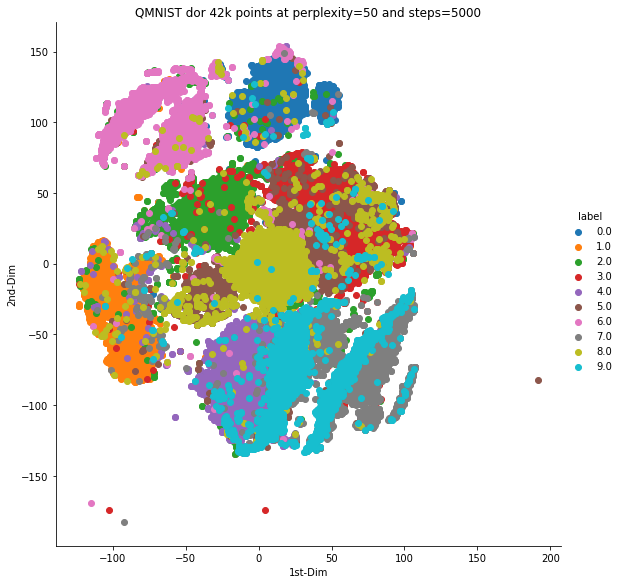

In [38]:
MODEL=TSNE(n_components=2,random_state=0,perplexity=50,n_iter=5000)

t_full_data=MODEL.fit_transform(standord_data)

#Creating New Dataframe
t_fulll=np.concatenate((t_full_data,label),axis=1)
t_full_df=pd.DataFrame(data=t_fulll,columns=('1st-Dim','2nd-Dim','label'))

#Plotting Dataframe
sns.FacetGrid(t_full_df,hue='label',size=8).map(plt.scatter,'1st-Dim','2nd-Dim').add_legend()
plt.title("QMNIST dor 42k points at perplexity=50 and steps=5000")